<a href="https://colab.research.google.com/github/arashkhgit/SnappBox_Pricing/blob/main/Snappbox_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distance Bucket
**Analysis task** :
What's your analysis of the pricing in this city? What are your suggestions to maximize the ride numbers?


**Data Loading:**
We'll start by loading the data from the Excel file using the **pandas** library.

In [ ]:
import pandas as pd
import numpy as np

# Load the data from the Excel sheet
file_path = '/content/SnappBox!.xlsx'
sheet_name = 'Distance Bucket'
df = pd.read_excel(file_path, sheet_name=sheet_name)

**Data Overview:**
Let's first get an overview of the data to understand its structure and values.

In [ ]:
df

**Data Preprocessing**

*   Converting 'Created Date' to datetime format.
*   Handling missing values by dropping rows with missing values.
*   Removing unnecessary columns.
*   Converting percentage columns to numeric format.
*   Converting 'Distance Buckets(KM)' to categorical format.
*   removing outliers.











In [ ]:
column_names = df.columns
print(column_names)

Index(['City', 'Service Type', 'Created Date', 'Distance Buckets(KM)',
       'Request', 'Offered Requests', 'Accepted Requests', 'Ride',
       'Total Ride Fare(GMV)(IRR)', ' Offered-Order / Created-Order %',
       'Accepted-Order / Offered-Order%', 'Fullfillment Rate%',
       'Average Ride Fare'],
      dtype='object')


In [ ]:
# Data Preprocessing: Convert 'Created Date' to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
# Data Cleaning: Handle missing values
df.dropna(inplace=True)
# Data Cleaning: Convert 'Distance Buckets(KM)' to categorical
df['Distance Buckets(KM)'] = df['Distance Buckets(KM)'].astype('category')


**Outlier Detection**


*   Perform outlier detection using both the Z-score and the
Interquartile Range (IQR) methods



In [ ]:
# Exclude datetime columns from the Z-score calculation
numeric_columns = df.select_dtypes(include=['float64']).columns
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
outliers_zscore = df[(z_scores > 3).any(axis=1)]

# Outlier Detection: IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Rename columns
column_name_mapping = {
    ' Offered-Order / Created-Order %': 'Offered-Created %',
    'Accepted-Order / Offered-Order%': 'Accepted-Offered %',
    'Fullfillment Rate%': 'Fulfillment %',
    'Total Ride Fare(GMV)(IRR)': 'Total Ride Fare',
    'Average Ride Fare': 'Avg. Ride Fare'
}
df.rename(columns=column_name_mapping, inplace=True)

In [ ]:
# Select only numeric columns for descriptive analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Descriptive Analysis for numeric columns
numeric_stats = df[numeric_columns].describe()
print("Descriptive Analysis for Numeric Columns:")
print(numeric_stats)

Descriptive Analysis for Numeric Columns:
       Service Type      Request  Offered Requests  Accepted Requests  \
count          34.0    34.000000         34.000000          34.000000   
mean            1.0   420.735294        406.294118         270.352941   
std             0.0   470.853275        458.983563         331.082237   
min             1.0     2.000000          2.000000           2.000000   
25%             1.0    11.000000         10.000000           5.250000   
50%             1.0   152.000000        142.500000          69.500000   
75%             1.0   897.750000        870.500000         589.000000   
max             1.0  1358.000000       1330.000000        1090.000000   

             Ride  Total Ride Fare  Offered-Created %  Accepted-Offered %  \
count   34.000000     3.400000e+01          34.000000           34.000000   
mean   223.911765     3.828559e+07           0.944085            0.659208   
std    282.116607     4.213199e+07           0.072664            0.17

In [ ]:
# Exclude datetime columns from the Z-score calculation
numeric_columns = df.select_dtypes(include=['float64']).columns
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
outliers_zscore = df[(z_scores > 3).any(axis=1)]

# Outlier Detection: IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers detected using Z-score method:")
print(outliers_zscore.to_string(index=False))

print("\nOutliers detected using IQR method:")
print(outliers_iqr.to_string(index=False))

Outliers detected using Z-score method:
City  Service Type Created Date Distance Buckets(KM)  Request  Offered Requests  Accepted Requests  Ride  Total Ride Fare  Offered-Created %  Accepted-Offered %  Fulfillment %  Avg. Ride Fare
   A           1.0   2022-06-22                23-24       14                10                  7     5          1655000           0.714286                 0.7       0.357143        331000.0

Outliers detected using IQR method:
City  Service Type Created Date Distance Buckets(KM)  Request  Offered Requests  Accepted Requests  Ride  Total Ride Fare  Offered-Created %  Accepted-Offered %  Fulfillment %  Avg. Ride Fare
   A           1.0   2022-06-22                23-24       14                10                  7     5          1655000           0.714286            0.700000       0.357143        331000.0
   A           1.0   2022-06-22                26-27        4                 3                  3     2           710000           0.750000            1.0

# Visualizations

 let's create some visualizations to compare different factors and their impact on ride numbers

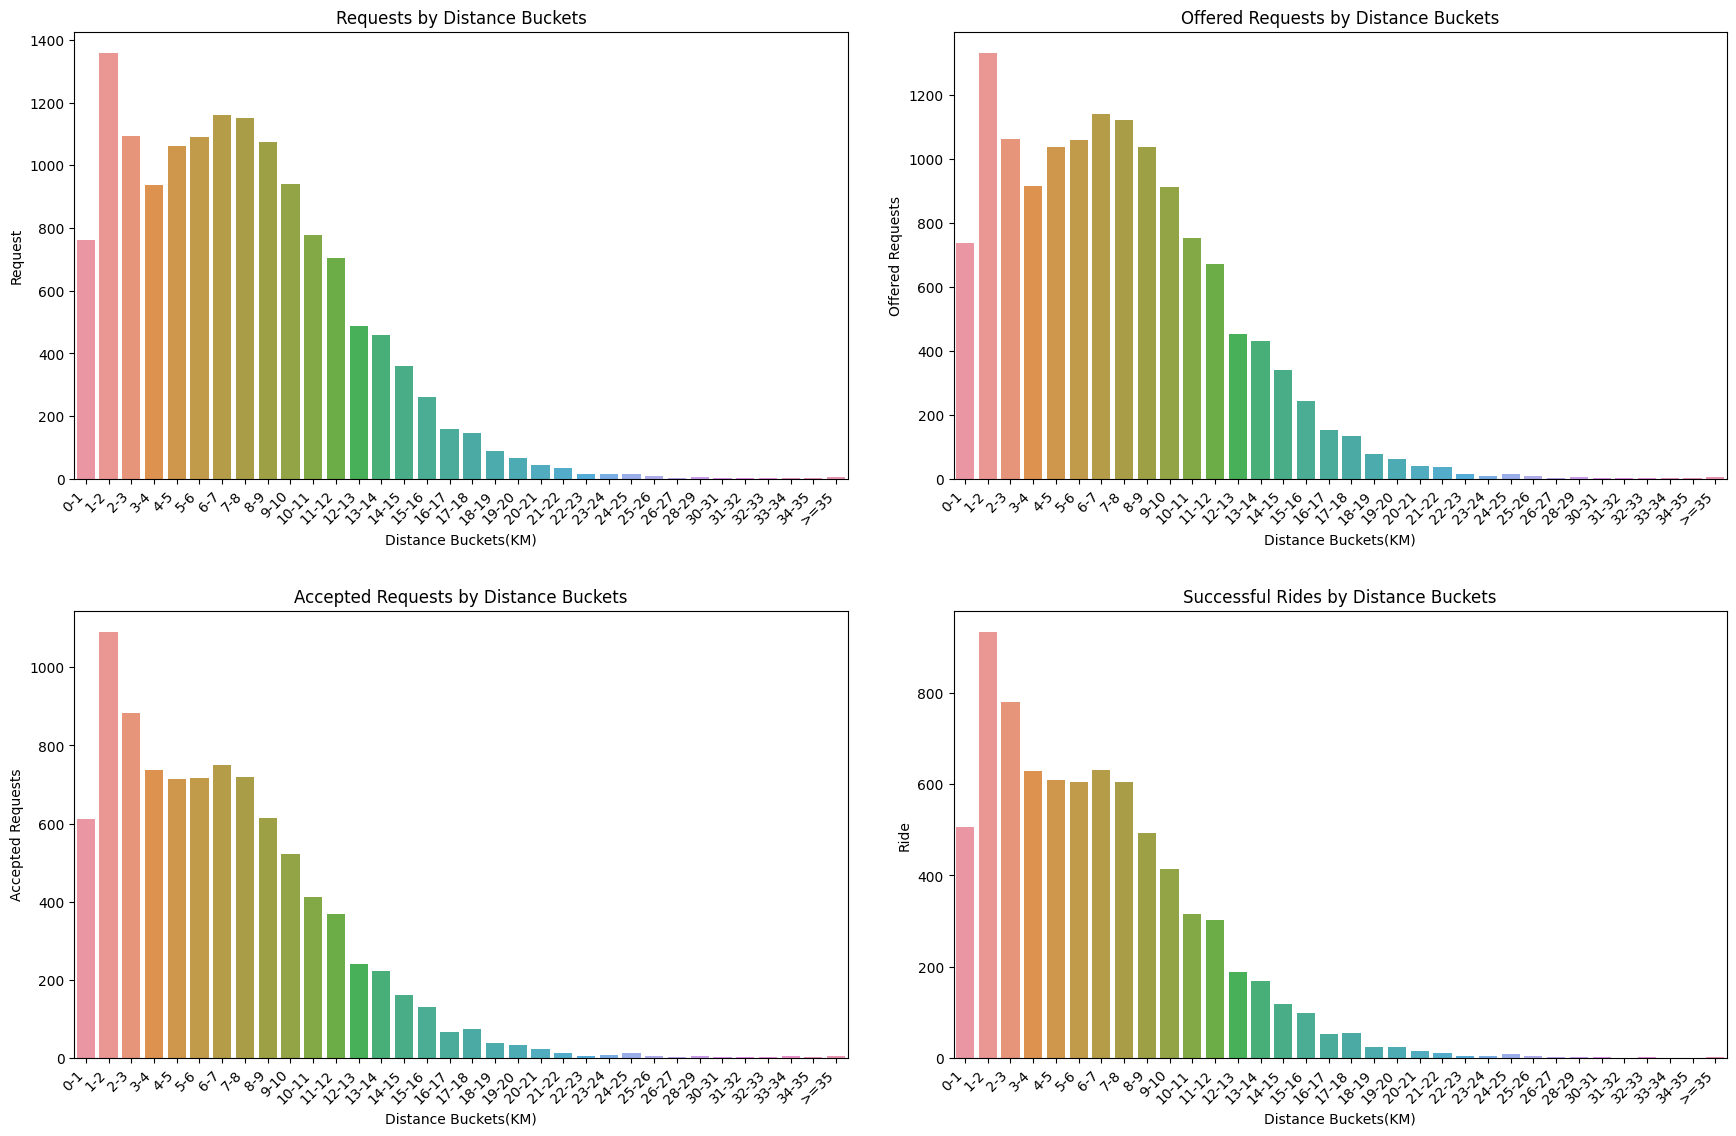

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel("/content/SnappBox!.xlsx", sheet_name="Distance Bucket")

# Rename columns
column_name_mapping = {
    ' Offered-Order / Created-Order %': 'Offered-Created %',
    'Accepted-Order / Offered-Order%': 'Accepted-Offered %',
    'Fullfillment Rate%': 'Fulfillment %',
    'Total Ride Fare(GMV)(IRR)': 'Total Ride Fare',
    'Average Ride Fare': 'Avg. Ride Fare'
}
data.rename(columns=column_name_mapping, inplace=True)

# Calculate Canceled Requests and Fulfillment Rate
data['Canceled Requests'] = data['Request'] - data['Ride']
data['Fulfillment %'] = data['Ride'] / data['Request']

# Create bar plots
plt.figure(figsize=(18, 12))

# Bar plot for Distance Buckets and Requests
plt.subplot(2, 2, 1)
sns.barplot(x='Distance Buckets(KM)', y='Request', data=data)
plt.title('Requests by Distance Buckets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Bar plot for Distance Buckets and Offered Requests
plt.subplot(2, 2, 2)
sns.barplot(x='Distance Buckets(KM)', y='Offered Requests', data=data)
plt.title('Offered Requests by Distance Buckets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Bar plot for Distance Buckets and Accepted Requests
plt.subplot(2, 2, 3)
sns.barplot(x='Distance Buckets(KM)', y='Accepted Requests', data=data)
plt.title('Accepted Requests by Distance Buckets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Bar plot for Distance Buckets and Successful Rides
plt.subplot(2, 2, 4)
sns.barplot(x='Distance Buckets(KM)', y='Ride', data=data)
plt.title('Successful Rides by Distance Buckets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout(pad=3)  # Increase spacing between plots
plt.show()


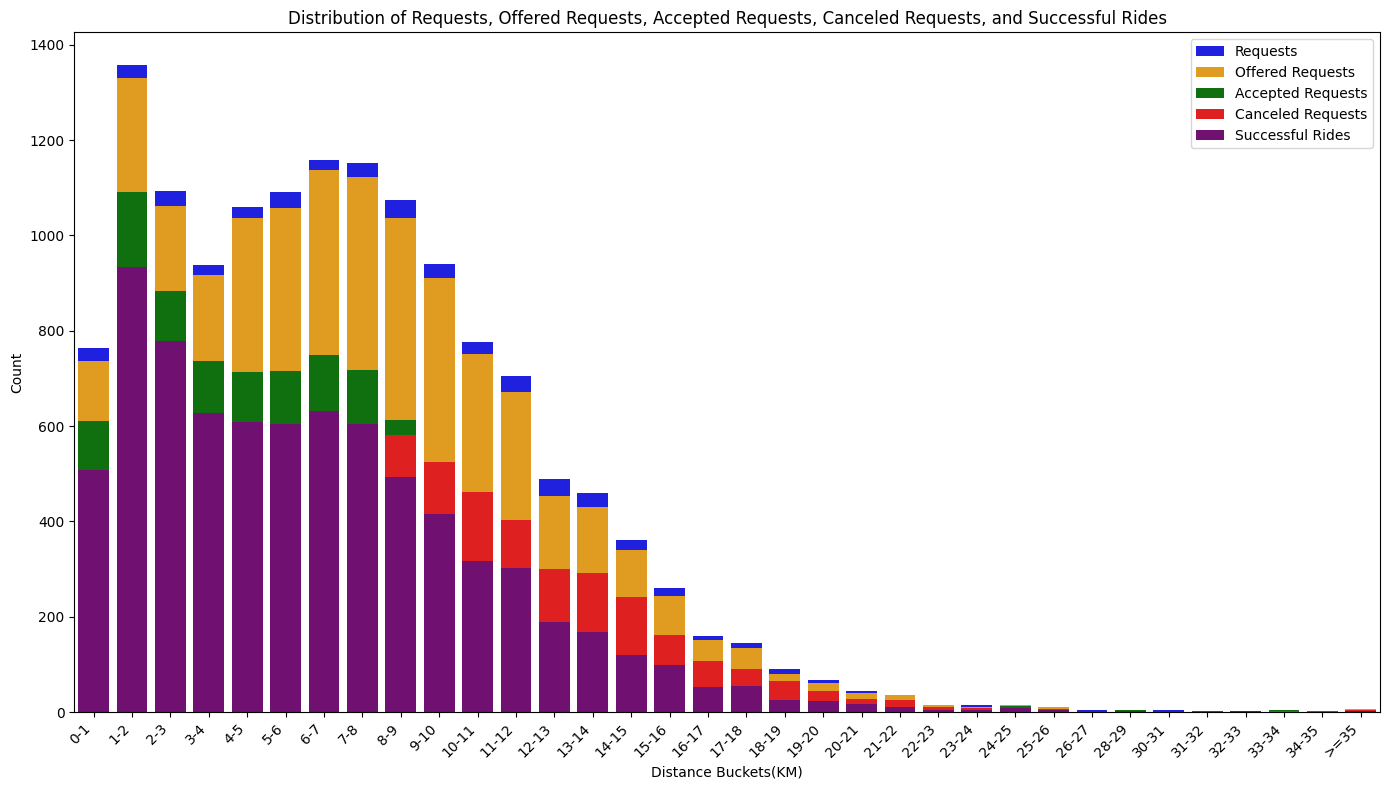

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel("/content/SnappBox!.xlsx", sheet_name="Distance Bucket")

# Rename columns
column_name_mapping = {
    ' Offered-Order / Created-Order %': 'Offered-Created %',
    'Accepted-Order / Offered-Order%': 'Accepted-Offered %',
    'Fullfillment Rate%': 'Fulfillment %',
    'Total Ride Fare(GMV)(IRR)': 'Total Ride Fare',
    'Average Ride Fare': 'Avg. Ride Fare'
}
data.rename(columns=column_name_mapping, inplace=True)

# Calculate Canceled Requests and Fulfillment Rate
data['Canceled Requests'] = data['Request'] - data['Ride']
data['Fulfillment %'] = data['Ride'] / data['Request']

# Create a grouped bar plot with custom colors
plt.figure(figsize=(14, 8))

sns.barplot(x='Distance Buckets(KM)', y='Request', data=data, color='blue', label='Requests')
sns.barplot(x='Distance Buckets(KM)', y='Offered Requests', data=data, color='orange', label='Offered Requests')
sns.barplot(x='Distance Buckets(KM)', y='Accepted Requests', data=data, color='green', label='Accepted Requests')
sns.barplot(x='Distance Buckets(KM)', y='Canceled Requests', data=data, color='red', label='Canceled Requests')
sns.barplot(x='Distance Buckets(KM)', y='Ride', data=data, color='purple', label='Successful Rides')

plt.title('Distribution of Requests, Offered Requests, Accepted Requests, Canceled Requests, and Successful Rides')
plt.xlabel('Distance Buckets(KM)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-10-84b9e414d18f>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


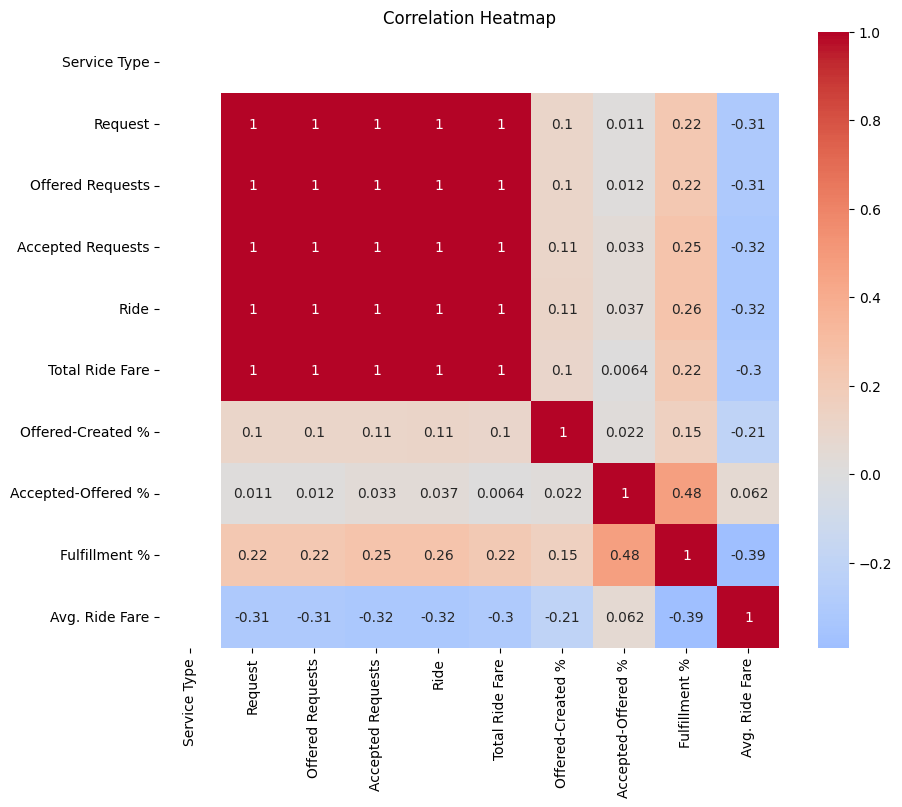

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel("/content/SnappBox!.xlsx", sheet_name="Distance Bucket")

# Rename columns
column_name_mapping = {
    ' Offered-Order / Created-Order %': 'Offered-Created %',
    'Accepted-Order / Offered-Order%': 'Accepted-Offered %',
    'Fullfillment Rate%': 'Fulfillment %',
    'Total Ride Fare(GMV)(IRR)': 'Total Ride Fare',
    'Average Ride Fare': 'Avg. Ride Fare'
}
data.rename(columns=column_name_mapping, inplace=True)

# Compute correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


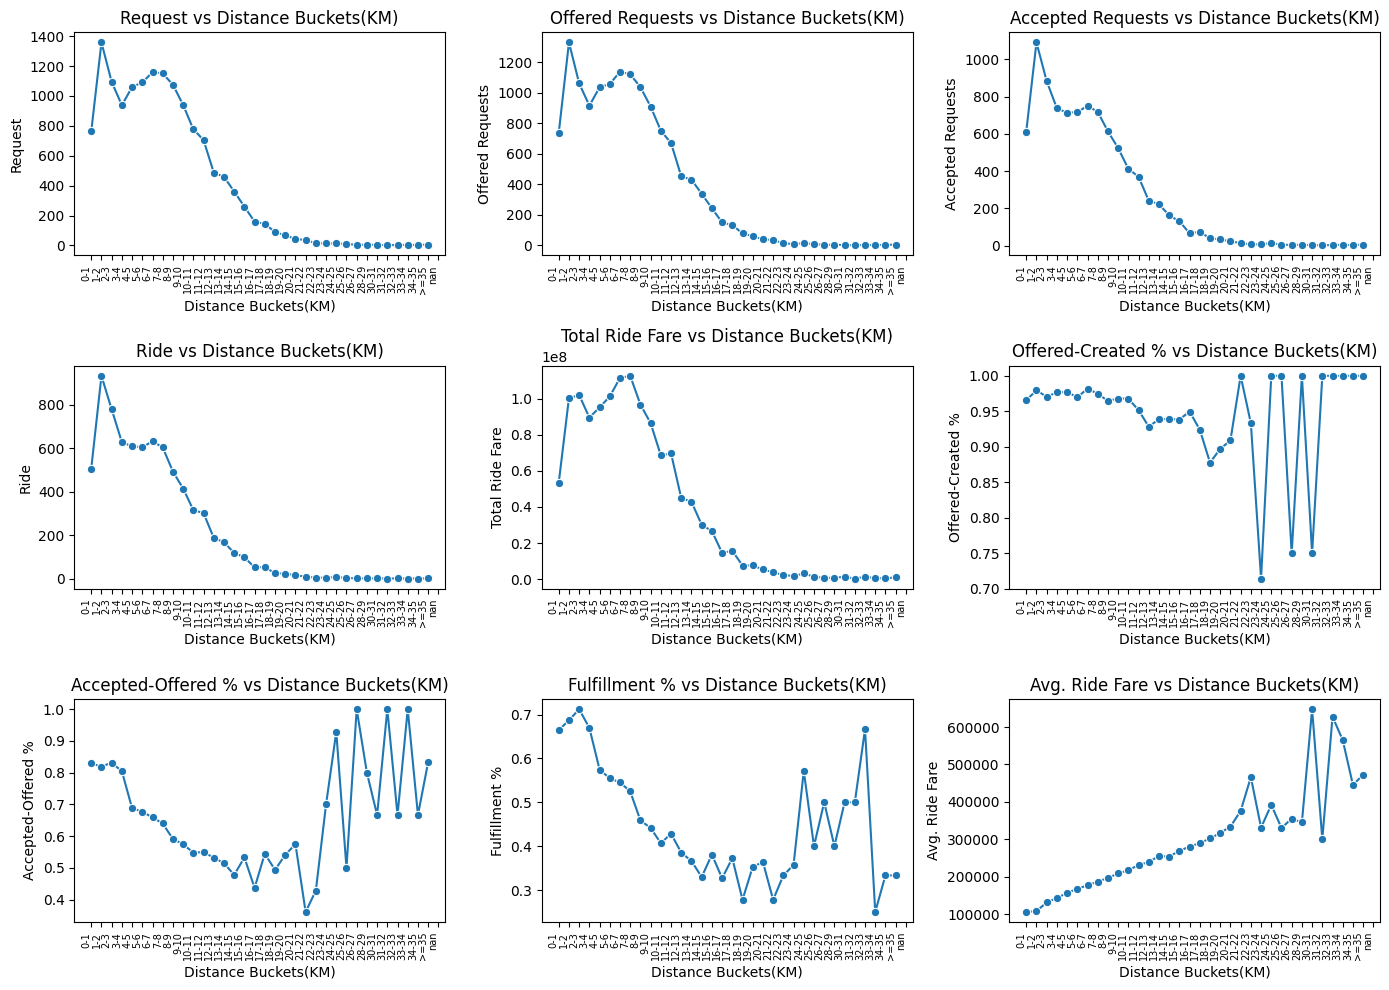

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel("/content/SnappBox!.xlsx", sheet_name="Distance Bucket")

# Rename columns
column_name_mapping = {
    ' Offered-Order / Created-Order %': 'Offered-Created %',
    'Accepted-Order / Offered-Order%': 'Accepted-Offered %',
    'Fullfillment Rate%': 'Fulfillment %',
    'Total Ride Fare(GMV)(IRR)': 'Total Ride Fare',
    'Average Ride Fare': 'Avg. Ride Fare'
}
data.rename(columns=column_name_mapping, inplace=True)

# Create separate line charts for each metric
plt.figure(figsize=(14, 10))

metrics = ['Request', 'Offered Requests', 'Accepted Requests', 'Ride', 'Total Ride Fare',
           'Offered-Created %', 'Accepted-Offered %', 'Fulfillment %', 'Avg. Ride Fare']

for i, metric in enumerate(metrics, start=1):
    plt.subplot(3, 3, i)
    sns.lineplot(x='Distance Buckets(KM)', y=metric, data=data, marker='o')
    plt.title(f'{metric} vs Distance Buckets(KM)')
    plt.xlabel('Distance Buckets(KM)')
    plt.ylabel(metric)
    plt.xticks(rotation=90, ha='right',fontsize=7)
    plt.xticks(range(len(data['Distance Buckets(KM)'])), data['Distance Buckets(KM)'])  # Set x-axis tick values
    plt.tight_layout()

plt.tight_layout()
plt.show()


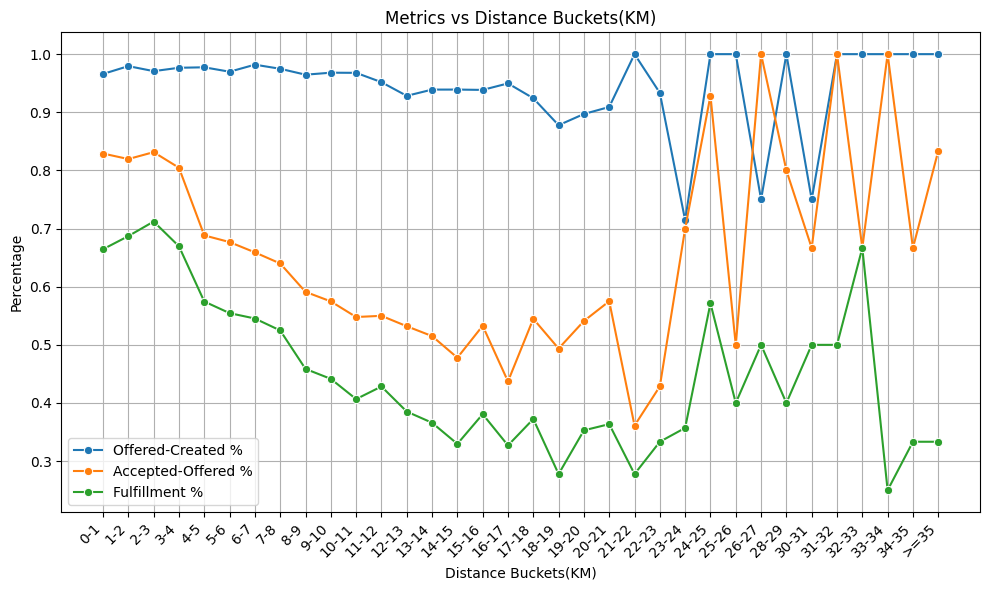

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel("/content/SnappBox!.xlsx", sheet_name="Distance Bucket")

# Rename columns
column_name_mapping = {
    ' Offered-Order / Created-Order %': 'Offered-Created %',
    'Accepted-Order / Offered-Order%': 'Accepted-Offered %',
    'Fullfillment Rate%': 'Fulfillment %',
    'Total Ride Fare(GMV)(IRR)': 'Total Ride Fare',
    'Average Ride Fare': 'Avg. Ride Fare'
}
data.rename(columns=column_name_mapping, inplace=True)

# Create line chart for specified metrics
plt.figure(figsize=(10, 6))

metrics = ['Offered-Created %', 'Accepted-Offered %', 'Fulfillment %']

for metric in metrics:
    sns.lineplot(x='Distance Buckets(KM)', y=metric, data=data, marker='o', label=metric)

plt.title('Metrics vs Distance Buckets(KM)')
plt.xlabel('Distance Buckets(KM)')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Ride Loss Calculation

On June 8th, there was a technical issue, and bikers couldn't accept the orders after 10 p.m., and the ride number dropped.
In this question, you should calculate the number of rides we lost because of this issue.


In [ ]:
import pandas as pd

# Load the data
data = pd.read_excel("/content/SnappBox!.xlsx", sheet_name="Ride Loss Calculation")

# Fill missing values in the "Date" column with the previous value
data['Date'] = data['Date'].fillna(method='ffill')

# Print the updated dataframe
print(data.to_string(index=False))


    Date  Hour  Requester   Request  Ride   Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  Fullfillment Rate%  Average Ride Fare
6/6/2022    19        4738     5826  3982                          0.991418                             0.83            0.683488      250651.682572
6/6/2022    20        4176     5155  3361                          0.991465                             0.80            0.651988      234125.260339
6/6/2022    21        3128     3860  2493                          0.986010                             0.79            0.645855      242015.643803
6/6/2022    22        1829     2272  1418                          0.984155                             0.78            0.624120      243427.362482
6/6/2022    23         897     1125   597                          0.976889                             0.70            0.530667      236649.916248
6/7/2022    19        4679     5676  3944                          0.989958                             0.84    

In [ ]:
# Combine Date and Hour columns into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Hour'].astype(str) + ':00')
# Drop the old Date and Hour columns
data.drop(['Date', 'Hour'], axis=1, inplace=True)
# Calculate offered orders
data['Offered Orders'] = data['Request'] * data[' Offered-Order / Created-Order %']

# Calculate accepted orders
data['Accepted Orders'] = data['Offered Orders'] * data['Accepted-Order / Offered-Order%']

# Calculate fulfilled orders (rides)
data['Fulfilled Orders'] = data['Request'] * data['Fullfillment Rate%']

# Sum up rides for the hours affected by the technical issue on June 8th
rides_lost = data[(data['Datetime'] >= '2022-06-08 22:00:00') & (data['Datetime'] <= '2022-06-08 23:00:00')]['Ride'].sum()

# Calculate the average rides on regular days (June 6th and June 7th)
average_rides = data[(data['Datetime'].dt.date == pd.to_datetime('2022-06-06')) | (data['Datetime'].dt.date == pd.to_datetime('2022-06-07'))]['Ride'].mean()

# Calculate the number of rides lost
rides_lost_due_to_issue = average_rides - rides_lost
# Filter data for June 8th from 10 pm to 11 pm
filtered_data = data[(data['Datetime'] >= '2022-06-08 22:00:00') & (data['Datetime'] <= '2022-06-08 23:00:00')]
# Calculate the absolute number of rides lost during the specific hours on June 8th
rides_lost_absolute = filtered_data['Request'] - filtered_data['Ride']
# Sum up the absolute rides lost to get the total number of rides lost
total_rides_lost_absolute = rides_lost_absolute.sum()

print("Total number of rides lost due to technical issue:", total_rides_lost_absolute)
print("Number of rides lost due to technical issue(average lost):", rides_lost_due_to_issue)

Total number of rides lost due to technical issue: 3734
Number of rides lost due to technical issue(average lost): 1293.5


<ipython-input-23-c3c7535eca2e>:18: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  average_rides = data[(data['Datetime'].dt.date == pd.to_datetime('2022-06-06')) | (data['Datetime'].dt.date == pd.to_datetime('2022-06-07'))]['Ride'].mean()


In [ ]:
# Calculate cancellation rate using the number of canceled orders
data['Cancellation Rate%'] = (data['Request'] - data['Ride']) / data['Request'] * 100

# Calculate the sum of fulfillment rate and cancellation rate
data['Sum of Rates'] = (data['Fullfillment Rate%']*100) + data['Cancellation Rate%']

# Check if the sum of rates is approximately 100%
is_sum_100_percent = (data['Sum of Rates'] >= 0.99*100) & (data['Sum of Rates'] <= 1.01*100)

print("Is the sum of fulfillment rate and cancellation rate 100% for all entries?", is_sum_100_percent.all())


Is the sum of fulfillment rate and cancellation rate 100% for all entries? True


# Price Monitoring

In this question, tell us what price action is needed to improve the business performance at 17:30.


In [ ]:
import pandas as pd

# Read the Excel file
xlsx_file = "/content/SnappBox!.xlsx"
sheet_name = "Price Monitoring"

# Read the three tables with specific row ranges
demand_data = pd.read_excel(xlsx_file, sheet_name, header=None, skiprows=2, usecols="A:G", nrows=22)
accepted_ratio_data = pd.read_excel(xlsx_file, sheet_name, header=None, skiprows=2, usecols="I:O", nrows=22)
fulfillment_rate_data = pd.read_excel(xlsx_file, sheet_name, header=None, skiprows=2, usecols="Q:W", nrows=22)
# Set the column names to the values of the second row
demand_data.columns = demand_data.iloc[0]
accepted_ratio_data.columns = accepted_ratio_data.iloc[0]
fulfillment_rate_data.columns = fulfillment_rate_data.iloc[0]

demand_data = demand_data[1:-1]
accepted_ratio_data = accepted_ratio_data[1:-1]
fulfillment_rate_data = fulfillment_rate_data[1:-1]

def convert_columns_to_datetime(dataframe):
    time_columns = dataframe.columns[1:]
    time_columns = [f"{int(hour)}:00" for hour in time_columns]
    dataframe.columns = ["Area Code"] + time_columns
    return dataframe

demand_data=convert_columns_to_datetime(demand_data)
accepted_ratio_data=convert_columns_to_datetime(accepted_ratio_data)
fulfillment_rate_data=convert_columns_to_datetime(fulfillment_rate_data)


fulfillment_rate_data.replace('-', np.nan, inplace=True)

print(demand_data.to_string(index=False))
print(accepted_ratio_data.to_string(index=False))
print(fulfillment_rate_data.to_string(index=False))

Area Code  12:00  13:00  14:00  15:00  16:00  17:00
      110     25   14.0     12    2.0     10      8
      111      4   11.0      7    2.0      8      3
      112     71   63.0     37   23.0     27     22
      113     37   46.0     23   21.0     18     14
      114     28   32.0     25    7.0      9      6
      115      6    4.0      4    7.0      3      4
      116      3    3.0      9    2.0      6      6
      117     49   39.0     25   16.0     19     13
      118     13   19.0     14    4.0      7      6
      119     76   53.0     26   17.0     19     15
      120     33   27.0     21   13.0     14     16
      121      6    5.0      7    NaN      1      6
      122      8    5.0      9    1.0      1      2
      123      3    NaN      3    1.0      4      3
      124      7   15.0      5    5.0      6      5
      125     46   32.0     29   18.0     14     14
      126      3    5.0      1    2.0      1      4
      127     57   39.0     30   11.0     18     11
      128   

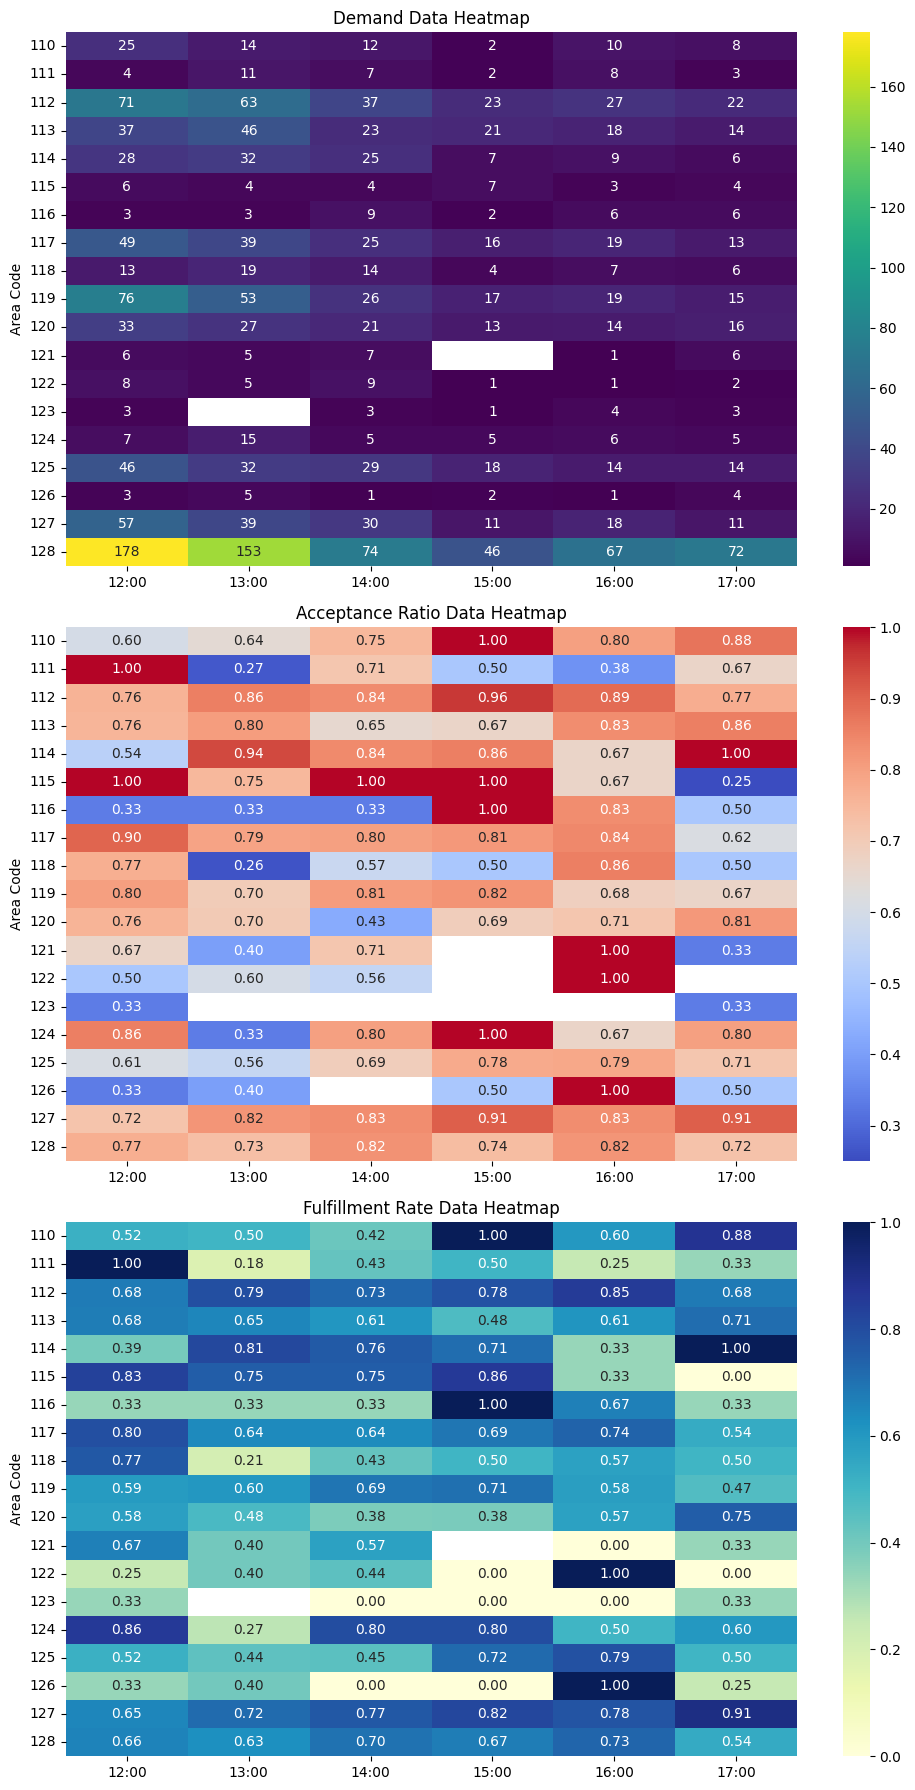

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Create heatmaps for each dataframe
sns.heatmap(data=demand_data.set_index('Area Code'), cmap='viridis', ax=axes[0],annot=True, fmt='.0f')
axes[0].set_title('Demand Data Heatmap')

sns.heatmap(data=accepted_ratio_data.set_index('Area Code'), cmap='coolwarm', ax=axes[1],annot=True, fmt='.2f')
axes[1].set_title('Acceptance Ratio Data Heatmap')


sns.heatmap(data=fulfillment_rate_data.set_index('Area Code'), cmap='YlGnBu', ax=axes[2],annot=True, fmt='.2f')
axes[2].set_title('Fulfillment Rate Data Heatmap')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


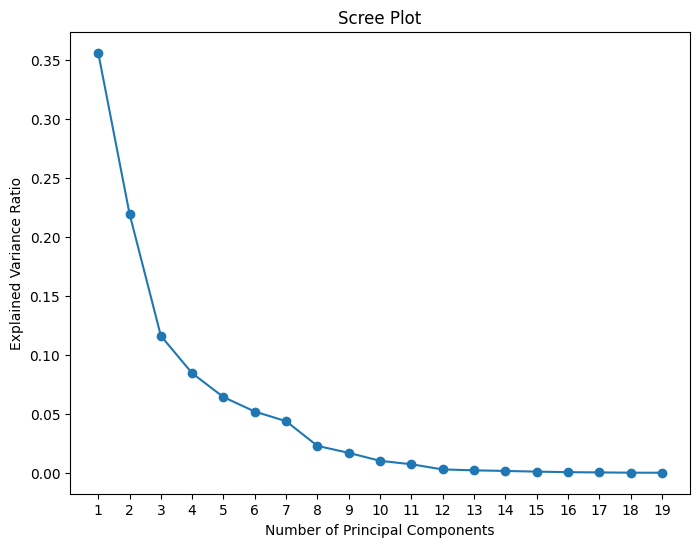

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data frames (demand_data, accepted_ratio_data, fulfillment_rate_data)

# Handle missing values by filling NaN with column mean
demand_data = demand_data.fillna(demand_data.mean())
accepted_ratio_data = accepted_ratio_data.fillna(accepted_ratio_data.mean())
fulfillment_rate_data = fulfillment_rate_data.fillna(fulfillment_rate_data.mean())

# Combine the three data frames
combined_data = pd.concat([demand_data, accepted_ratio_data, fulfillment_rate_data], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot to visualize explained variance ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


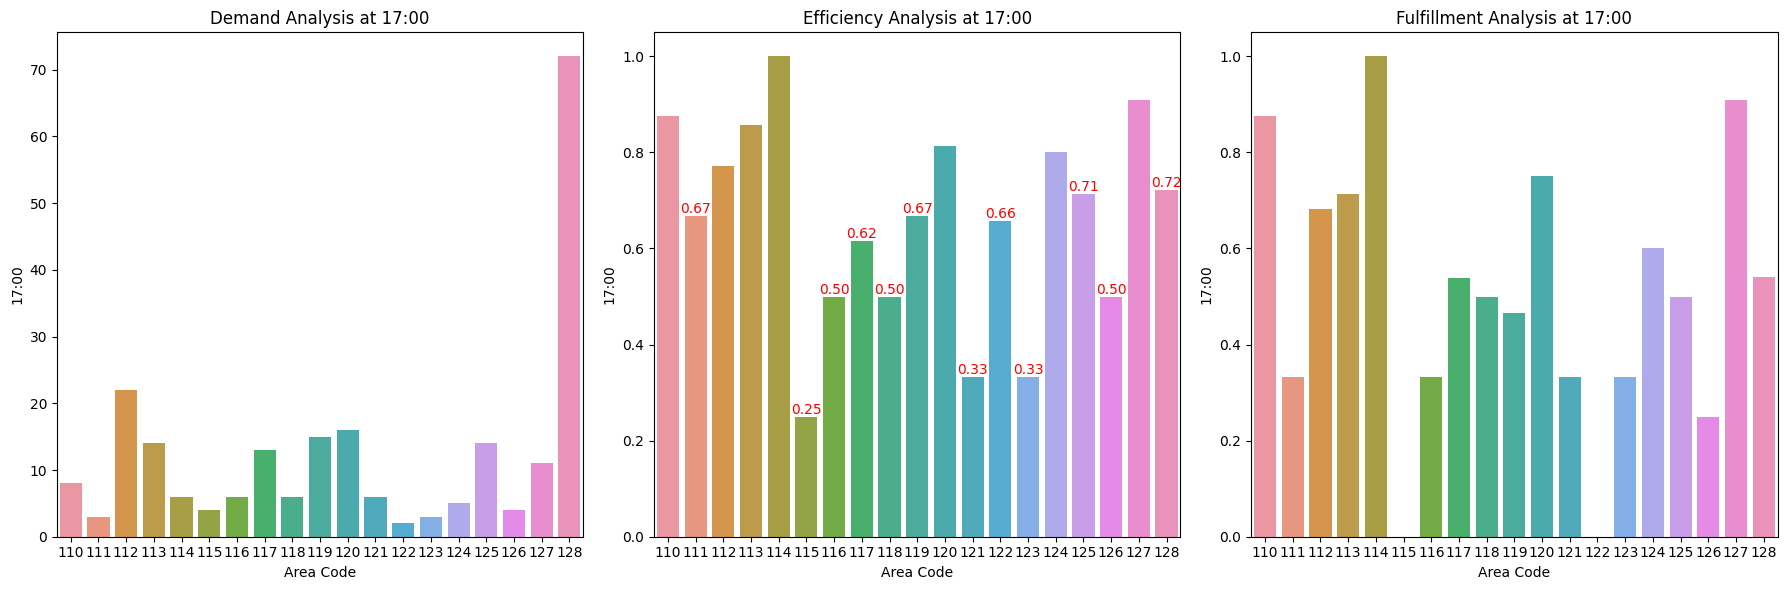

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframes here
# request_df, accepted_ratio_df, fulfillment_rate_df

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Demand Analysis: Bar plot of requests at 17:00
sns.barplot(x='Area Code', y='17:00', data=demand_data, ax=axes[0])
axes[0].set_title('Demand Analysis at 17:00')

# Efficiency Analysis: Bar plot of accepted-order ratios at 17:00
efficiency_plot = sns.barplot(x='Area Code', y='17:00', data=accepted_ratio_data, ax=axes[1])
efficiency_plot.set_title('Efficiency Analysis at 17:00')

# Add annotations for efficiency lower than 75%
for bar in efficiency_plot.patches:
    if bar.get_height() < 0.75:
        efficiency_plot.annotate(f'{bar.get_height():.2f}',
                                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                 ha='center', va='bottom', color='red')

# Fulfillment Analysis: Bar plot of fulfillment rates at 17:00
sns.barplot(x='Area Code', y='17:00', data=fulfillment_rate_data, ax=axes[2])
axes[2].set_title('Fulfillment Analysis at 17:00')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


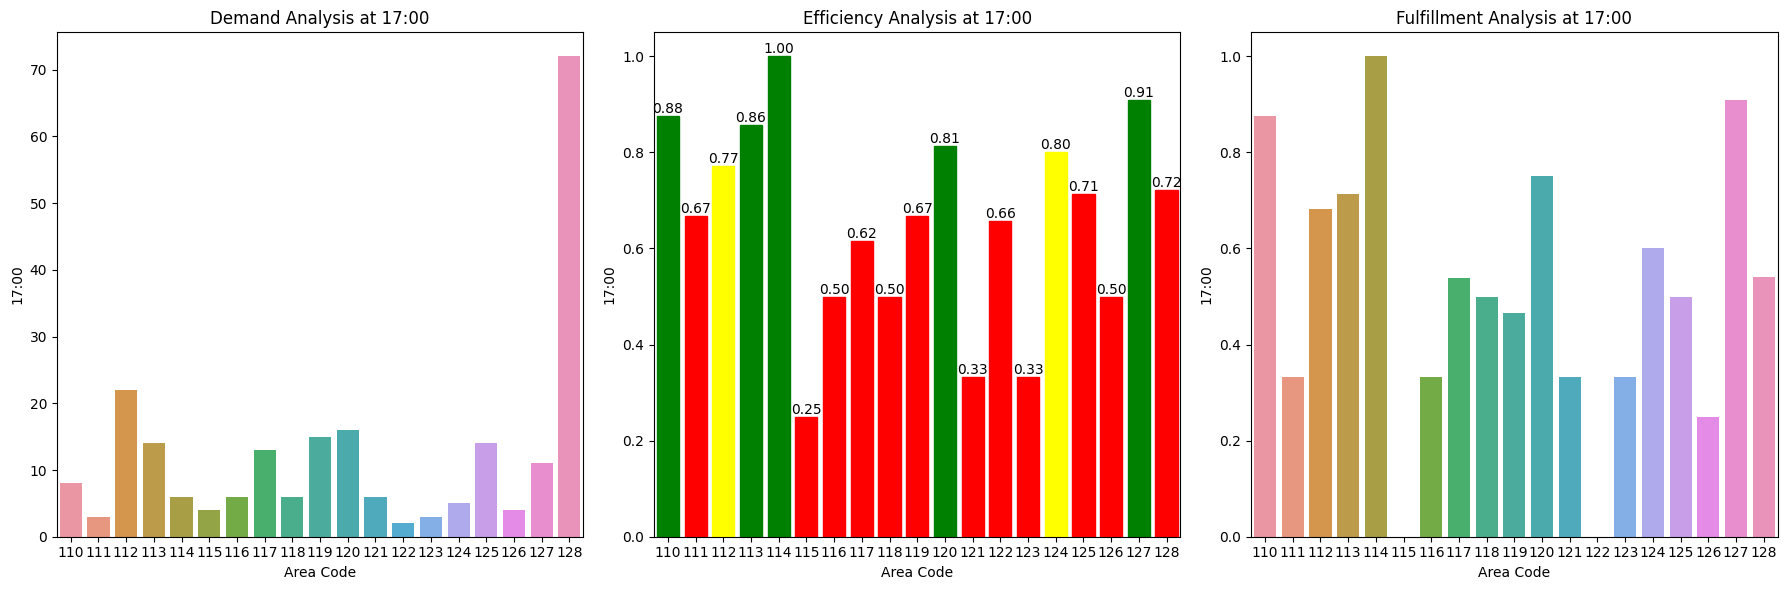

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframes here
# request_df, accepted_ratio_df, fulfillment_rate_df

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Demand Analysis: Bar plot of requests at 17:00
sns.barplot(x='Area Code', y='17:00', data=demand_data, ax=axes[0])
axes[0].set_title('Demand Analysis at 17:00')

# Efficiency Analysis: Bar plot of accepted-order ratios at 17:00
efficiency_plot = sns.barplot(x='Area Code', y='17:00', data=accepted_ratio_data, ax=axes[1])
efficiency_plot.set_title('Efficiency Analysis at 17:00')

# Add color coding for efficiency ranges
for bar in efficiency_plot.patches:
    if bar.get_height() < 0.75:
        color = 'red'
    elif 0.75 <= bar.get_height() <= 0.80:
        color = 'yellow'
    else:
        color = 'green'
    bar.set_color(color)
    efficiency_plot.annotate(f'{bar.get_height():.2f}',
                             (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                             ha='center', va='bottom', color='black')

# Fulfillment Analysis: Bar plot of fulfillment rates at 17:00
sns.barplot(x='Area Code', y='17:00', data=fulfillment_rate_data, ax=axes[2])
axes[2].set_title('Fulfillment Analysis at 17:00')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the mean fulfillment rate at 17:00
mean_fulfillment_rate = fulfillment_rate_data['17:00'].mean()

# Filter areas with efficiency rates in the desired range (75% to 80%)
desired_efficiency_areas = accepted_ratio_data[
    (accepted_ratio_data['17:00'] >= 0.75)
]

# Filter areas with high demand (requests) and lower fulfillment rates than the mean
high_demand_low_fulfillment = fulfillment_rate_data[
    (fulfillment_rate_data['17:00'] < mean_fulfillment_rate) &
    (demand_data['17:00'] > demand_data['17:00'].mean())
]

# Filter areas with high demand but efficiency lower than 75%
high_demand_low_efficiency = accepted_ratio_data[
    (accepted_ratio_data['17:00'] < 0.75) &
    (demand_data['17:00'] > demand_data['17:00'].mean())
]

# Print the results
print("Areas with efficiency more than 75% :")
print(desired_efficiency_areas)

print("\nAreas with high demand but lower fulfillment rates:")
print(high_demand_low_fulfillment)

print("\nAreas with high demand and efficiency lower than 75%:")
print(high_demand_low_efficiency)


Areas with efficiency more than 75% :
    Area Code     12:00     13:00     14:00     15:00     16:00     17:00
1         110  0.600000  0.642857  0.750000  1.000000  0.800000  0.875000
3         112  0.760563  0.857143  0.837838  0.956522  0.888889  0.772727
4         113  0.756757  0.804348  0.652174  0.666667  0.833333  0.857143
5         114  0.535714  0.937500  0.840000  0.857143  0.666667  1.000000
11        120  0.757576  0.703704  0.428571  0.692308  0.714286  0.812500
15        124  0.857143  0.333333  0.800000  1.000000  0.666667  0.800000
18        127  0.719298  0.820513  0.833333  0.909091  0.833333  0.909091

Areas with high demand but lower fulfillment rates:
    Area Code     12:00     13:00     14:00     15:00     16:00     17:00
10        119  0.592105  0.603774  0.692308  0.705882  0.578947  0.466667
16        125  0.521739  0.437500  0.448276  0.722222  0.785714  0.500000

Areas with high demand and efficiency lower than 75%:
    Area Code     12:00     13:00     14

# Price Test

* What's your analysis of the test result based on this data? Should we increase our prices in these cities? Explain your answer.



In [ ]:
import pandas as pd

# Create the data manually
data = {
    'Request': [-6, -2, -5, -2, -4, -3, -5, 3, -4, -9, -2, -6],
    'Ride': [-1, 2, -4, -5, -5, -3, 3, -1, -4, 2, -4, -7],
    'Price Conversion': [-1, -1, -1, -4, 0, -2, 1, -1, -1, -2, -1, -1],
    'Accepted-Order / Offered-Order%': [2, 1, 0, -1, -2, 0, 5, 2, 4, 7, -2, -2],
    'Fullfillment Rate%': [3, 3, 0, -2, -1, 0, 5, 2, 2, 7, -1, -1],
    'GMV': [3, 4, -3, 9, -7, -2, 1, 1, 14, 5, -8, -1],
    'Average Fare Per KM': [6, 3, 1, 12, 1, 3, 1, 1, 20, 7, -4, -5],
    'Ride Per Check': [1, 1, -1, -1, -1, 0, 1, 1, 0, 1, 0, -1],
    'Test Number': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'City Number': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate Check and Checker columns
non_percentage_columns = ['Request', 'Ride', 'Price Conversion', 'Accepted-Order / Offered-Order%', 'Fullfillment Rate%', 'GMV', 'Average Fare Per KM', 'Ride Per Check']
df['Check'] = df['Request'] * df['Price Conversion'] / 100
df['Checker'] = df['Request'] * df['Ride Per Check'] / 100

print(df.to_string(index=False))

 Request  Ride  Price Conversion  Accepted-Order / Offered-Order%  Fullfillment Rate%  GMV  Average Fare Per KM  Ride Per Check  Test Number  City Number  Check  Checker
      -6    -1                -1                                2                   3    3                    6               1            1            1   0.06    -0.06
      -2     2                -1                                1                   3    4                    3               1            2            1   0.02    -0.02
      -5    -4                -1                                0                   0   -3                    1              -1            1            2   0.05     0.05
      -2    -5                -4                               -1                  -2    9                   12              -1            2            2   0.08     0.02
      -4    -5                 0                               -2                  -1   -7                    1              -1            1          

In [ ]:
import pandas as pd

# Create a DataFrame with the provided data
data = pd.DataFrame({
    'Request': [-6, -2, -5, -2, -4, -3, -5, -4, -8, -9, -2, -6],
    'Ride': [-1, 2, -4, -5, -5, -3, 3, -1, -4, 2, -4, -7],
    'Price Conversion': [-1, -1, -1, -4, 0, -2, 1, -1, -1, -2, -1, -1],
    'Accepted-Order / Offered-Order%': [2, 1, 0, -1, -2, 0, 5, 2, 4, 7, -2, -2],
    'Fullfillment Rate%': [3, 3, 0, -2, -1, 0, 5, 2, 2, 7, -1, -1],
    'GMV': [3, 4, -3, 9, -7, -2, 1, -3, 14, 5, -8, -1],
    'Average Fare Per KM': [6, 3, 1, 12, 1, 3, 1, 1, 20, 7, -4, -5],
    'Ride Per Check': [1, 1, -1, -1, -1, 0, 1, 0, 0, 1, 0, -1],
    'Test Number': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'City Number': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6],
})

# Separate data for Test 1 and Test 2
test1_data = data[data['Test Number'] == 1]
test2_data = data[data['Test Number'] == 2]

# Calculate the average for each test in each city
average_test1 = test1_data.groupby('City Number').mean()
average_test2 = test2_data.groupby('City Number').mean()

# Compare the averages between Test 1 and Test 2
comparison = average_test2 - average_test1
print(test1_data.mean())
print(test2_data.mean())
print((test1_data.mean() > test2_data.mean()))

Request                           -5.000000
Ride                              -2.500000
Price Conversion                  -0.500000
Accepted-Order / Offered-Order%    1.166667
Fullfillment Rate%                 1.333333
GMV                                0.000000
Average Fare Per KM                4.166667
Ride Per Check                     0.000000
Test Number                        1.000000
City Number                        3.500000
dtype: float64
Request                           -4.333333
Ride                              -2.000000
Price Conversion                  -1.833333
Accepted-Order / Offered-Order%    1.166667
Fullfillment Rate%                 1.500000
GMV                                2.000000
Average Fare Per KM                3.500000
Ride Per Check                     0.000000
Test Number                        2.000000
City Number                        3.500000
dtype: float64
Request                            False
Ride                               False
Price Co

In [ ]:
import pandas as pd

data = {
    'Request': [-6, -2, -5, -2, -4, -3, -5, 3, -4, -9, -2, -6],
    'Ride': [-1, 2, -4, -5, -5, -3, 3, -1, -4, 2, -4, -7],
    'Price Conversion': [-1, -1, -1, -4, 0, -2, 1, -1, -1, -2, -1, -1],
    'Accepted-Order / Offered-Order%': [2, 1, 0, -1, -2, 0, 5, 2, 4, 7, -2, -2],
    'Fullfillment Rate%': [3, 3, 0, -2, -1, 0, 5, 2, 2, 7, -1, -1],
    'GMV': [3, 4, -3, 9, -7, -2, 1, 1, 14, 5, -8, -1],
    'Average Fare Per KM': [6, 3, 1, 12, 1, 3, 1, 1, 20, 7, -4, -5],
    'Ride Per Check': [1, 1, -1, -1, -1, 0, 1, 1, 0, 1, 0, -1],
    'Test Number': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'City Number': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate averages for each column based on each test day
averages_test_day_1 = df[df['Test Number'] == 1].groupby('City Number').mean()
averages_test_day_2 = df[df['Test Number'] == 2].groupby('City Number').mean()

print("Averages for Test Day 1:")
print(averages_test_day_1.to_string(index=False))
print("\nAverages for Test Day 2:")
print(averages_test_day_2.to_string(index=False))


Averages for Test Day 1:
 Request  Ride  Price Conversion  Accepted-Order / Offered-Order%  Fullfillment Rate%  GMV  Average Fare Per KM  Ride Per Check  Test Number
    -6.0  -1.0              -1.0                              2.0                 3.0  3.0                  6.0             1.0          1.0
    -5.0  -4.0              -1.0                              0.0                 0.0 -3.0                  1.0            -1.0          1.0
    -4.0  -5.0               0.0                             -2.0                -1.0 -7.0                  1.0            -1.0          1.0
    -5.0   3.0               1.0                              5.0                 5.0  1.0                  1.0             1.0          1.0
    -4.0  -4.0              -1.0                              4.0                 2.0 14.0                 20.0             0.0          1.0
    -2.0  -4.0              -1.0                             -2.0                -1.0 -8.0                 -4.0             0.0  